# Introduction

According to the Mayo Clinic, heart disease describes a range of conditions that affect the heart. Heart diseases include:

* Blood vessel disease, such as coronary artery disease
* Irregular heartbeats (arrhythmias)
* Heart problems you're born with (congenital heart defects)
* Disease of the heart muscle
* Heart valve disease

 Many forms of heart disease can be prevented or treated with healthy lifestyle choices.[^1]
 
 [^1]: https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118
 
 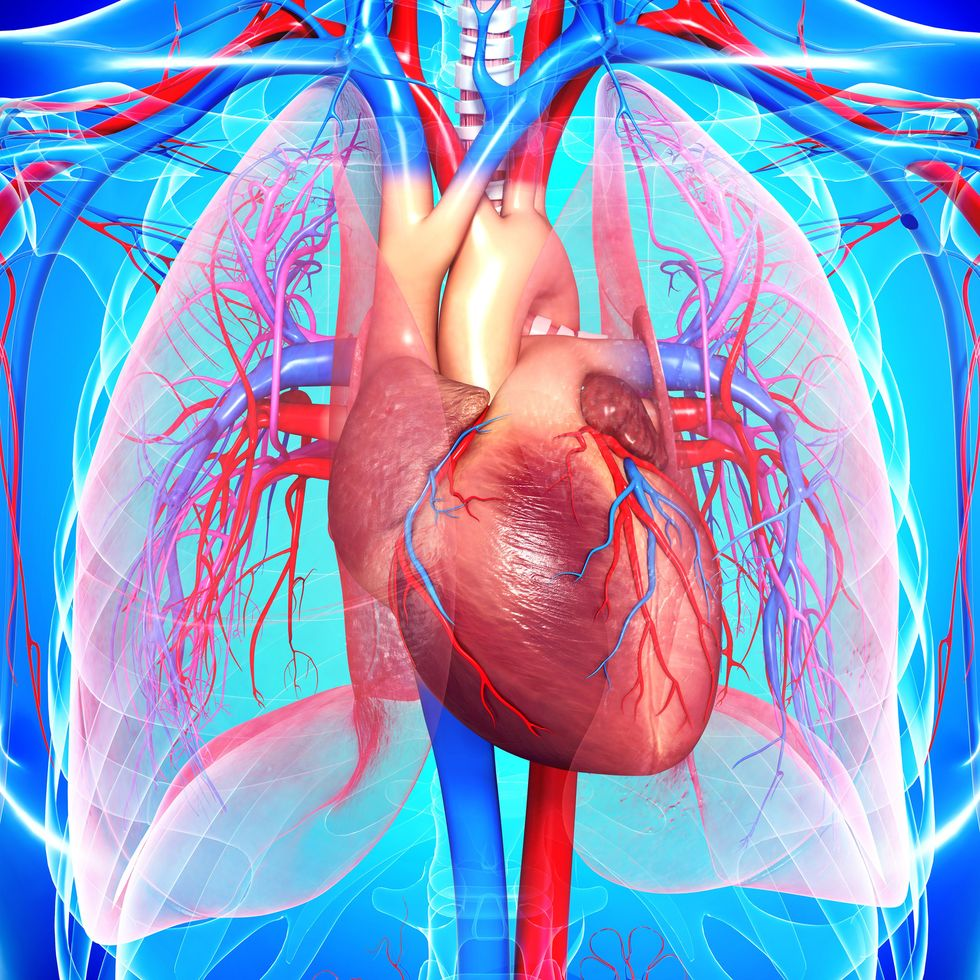

**About Dataset**

**Context**

The dataset is the Cleveland Heart Disease dataset taken from the UCI repository. The dataset consists of 303 individuals’ data. There are 14 columns in the dataset(which have been extracted from a larger set of 75). No missing values. The classification task is to predict whether an individual is suffering from heart disease or not. (0: absence, 1: presence)

original data[^2]

[^2]: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Content**

This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

* **Age:** Patients Age in years (Numeric)

* **Sex:** Gender (Male : 1; Female : 0) (Nominal)

* **cp:** Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)

* **trestbps:** patient's level of blood pressure at resting mode in mm/HG (Numerical)

* **chol:** Serum cholesterol in mg/dl (Numeric)

* **fbs:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

* **restecg:** Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)

* **thalach:** Maximum heart rate achieved (Numeric)

* **exang:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)

* **oldpeak:** Exercise induced ST-depression in relative with the state of rest (Numeric)

* **slope:** ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)

* **ca:** The number of major vessels (0–3)(nominal)

* **thal:** A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)

* **target:** It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.


**Loading libraries**

Firstly I will start by loading some packages that I will use during the analysis

In [1]:
library(tidyverse)
library(ggthemes)
library(caret)
library(splines)
library(rpart)
library(rpart.plot)
library(ggcorrplot)
library(corrplot)
library(ppcor)
library(psych)
library(REdaS)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


corrplot 0.92 loaded

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required packag

In [2]:
require(devtools)
install_version("EFAtools", version = "0.3.0")
library(EFAtools)
## re-install rlang
install.packages("rlang")
##re-install ggplot2
install.packages("ggplot2")
library(rlang)
library(ggplot2)

Loading required package: devtools

Loading required package: usethis




parallelly   (1.35.0     -> 1.36.0    ) [CRAN]
RcppArmad... (0.12.2.0.0 -> 0.12.4.0.0) [CRAN]


Installing 2 packages: parallelly, RcppArmadillo

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘EFAtools’


The following object is masked from ‘package:psych’:

    KMO


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("rlang"):
“installation of package ‘rlang’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice




**Getting the data**


In [3]:
heart<-read.csv("/kaggle/input/heart-disease-cleveland/Heart_disease_cleveland_new.csv")

# Exploration of the data

The structure of the data

In [4]:
##the structure of the data
str(heart)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : int  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : int  0 3 3 2 1 1 3 3 3 3 ...
 $ trestbps: int  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : int  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : int  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : int  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : int  2 1 1 2 0 0 2 0 1 2 ...
 $ ca      : int  0 3 2 0 0 0 2 0 1 0 ...
 $ thal    : int  2 1 3 1 1 1 1 1 3 3 ...
 $ target  : int  0 1 1 0 0 0 1 0 1 1 ...


summary of the data


In [5]:
##summary of the data
summary(heart)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :2.000   Median :130.0  
 Mean   :54.44   Mean   :0.6799   Mean   :2.158   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:3.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope              ca        
 M

convert the dependent variable to a character


In [6]:
heart$target<-as.character(heart$target)

**Checking for NAs**



In [7]:
colSums(is.na(heart))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

**plotting the independent variables against the diagnosis**

**Age**

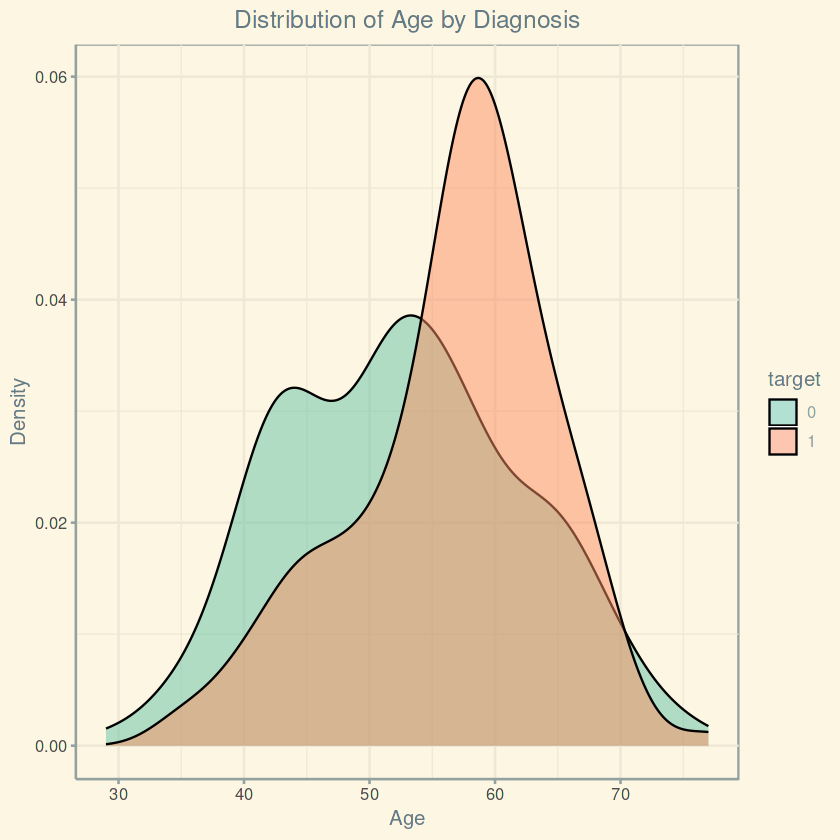

In [8]:
##Age
ggplot(heart,aes(x=age,fill=target))+
  geom_density(alpha=0.5)+
  ggtitle("Distribution of Age by Diagnosis")+
  xlab("Age")+
  ylab("Density")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))

**Sex**

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


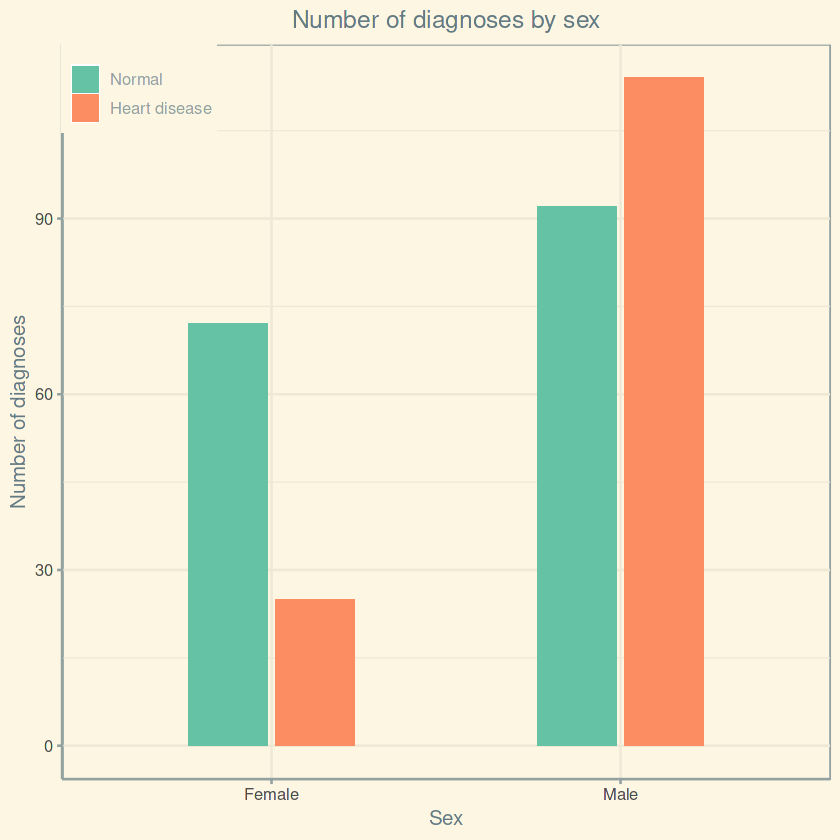

In [9]:
##sex
ggplot(heart,aes(x=as.character(sex),fill=target))+
  geom_bar(width = 0.5,position = "dodge2")+
  ggtitle("Number of diagnoses by sex")+
  xlab("Sex")+
  ylab("Number of diagnoses")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_x_discrete(
    breaks = c(0, 1),
    labels = c("Female", "Male"))+
  scale_fill_manual(labels = c("Normal", "Heart disease"),
                    values = c( "#66c2a5", "#fc8d62"))+
  theme(legend.title=element_blank())+
  theme(legend.position=c(0.1,0.94))

**Type of chest pain**


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


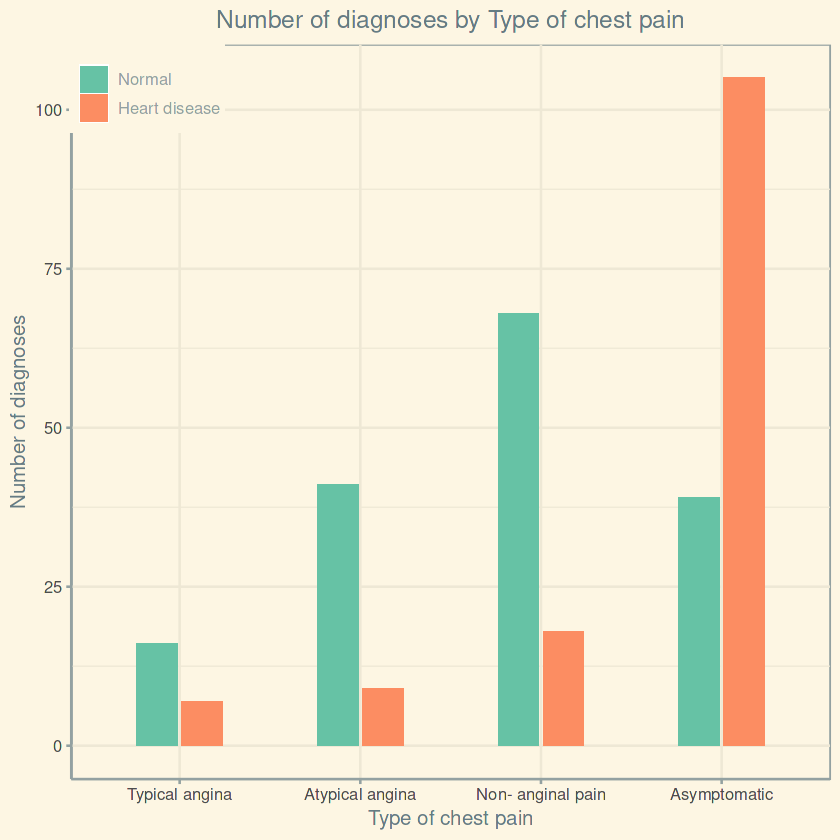

In [10]:

##cp
##Type of chest pain experienced by patient
## 0 typical angina, 1 atypical angina, 
## 2 non- anginal pain, 3 asymptomatic 

ggplot(heart,aes(x=as.character(cp),fill=target))+
  geom_bar(width = 0.5,position = "dodge2")+
  ggtitle("Number of diagnoses by Type of chest pain")+
  xlab("Type of chest pain")+
  ylab("Number of diagnoses")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_x_discrete(
    breaks = c(0, 1,2,3),
    labels = c("Typical angina", "Atypical angina","Non- anginal pain","Asymptomatic"))+
  scale_fill_manual(labels = c("Normal", "Heart disease"),
                    values = c( "#66c2a5", "#fc8d62"))+
  theme(legend.title=element_blank())+
  theme(legend.position=c(0.1,0.94))

**patient's level of blood pressure at resting mode**


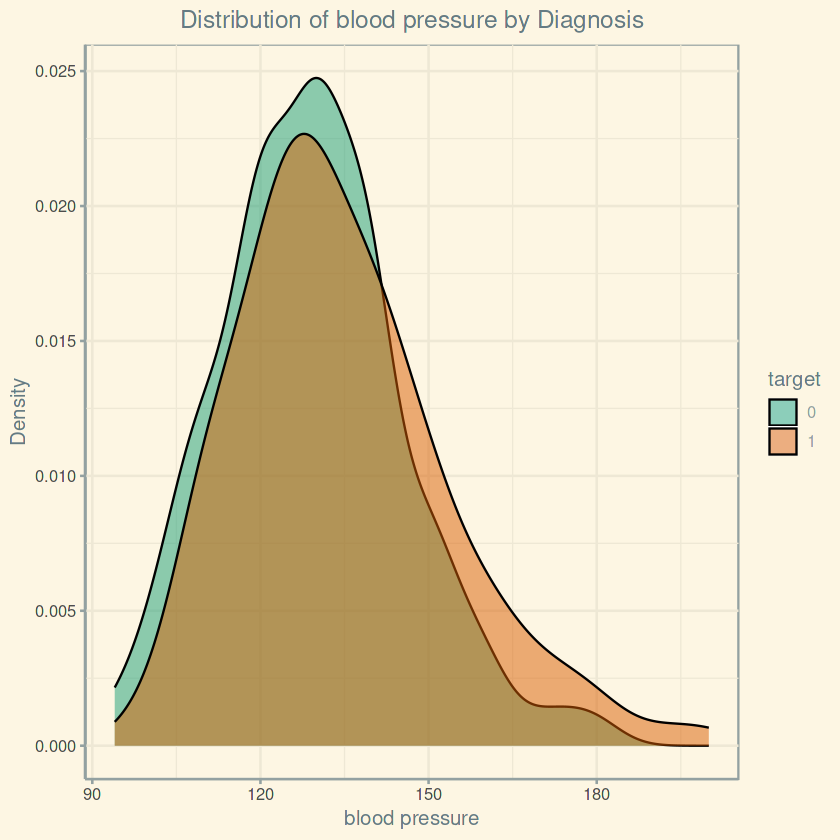

In [11]:

##trestbps
##patient's level of blood pressure at resting mode in mm/HG
ggplot(heart,aes(x=trestbps,fill=target))+
  geom_density(alpha=0.5)+
  ggtitle("Distribution of blood pressure by Diagnosis")+
  xlab("blood pressure")+
  ylab("Density")+
  theme_solarized()+
  scale_fill_brewer(palette="Dark2")+
  theme(plot.title = element_text(hjust = 0.5))

**Serum cholesterol**


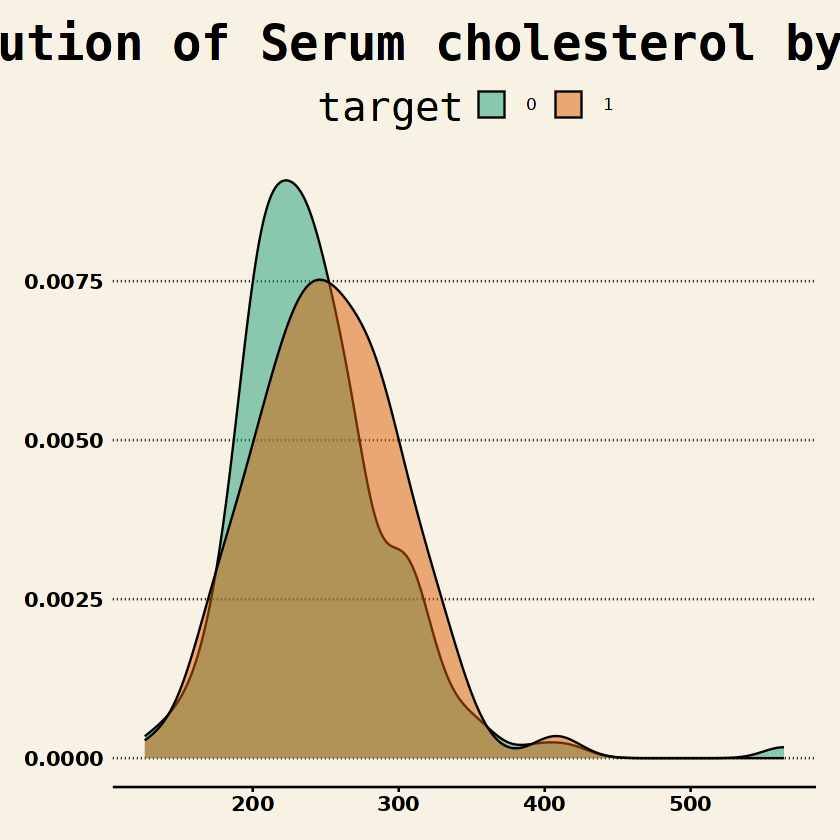

In [12]:

##chol
##Serum cholesterol in mg/dl 
ggplot(heart,aes(x=chol,fill=target))+
  geom_density(alpha=0.5)+
  ggtitle("Distribution of Serum cholesterol by Diagnosis")+
  xlab("Serum cholesterol ")+
  ylab("Density")+
  theme_wsj()+
  scale_fill_brewer(palette="Dark2")+
  theme(plot.title = element_text(hjust = 0.5))

**Blood sugar levels on fasting**


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


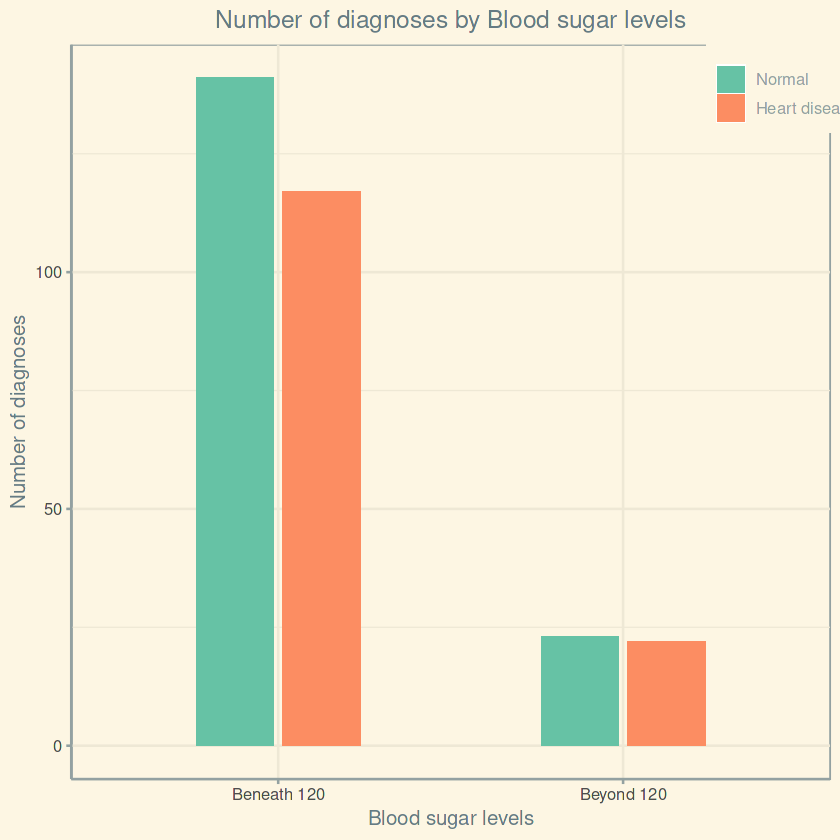

In [13]:
##fbs
##Blood sugar levels on fasting > 120 mg/dl represents as 1
## in case of true and 0 as false 
ggplot(heart,aes(x=as.character(fbs),fill=target))+
  geom_bar(width = 0.5,position = "dodge2")+
  ggtitle("Number of diagnoses by Blood sugar levels")+
  xlab("Blood sugar levels")+
  ylab("Number of diagnoses")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_x_discrete(
    breaks = c(0, 1),
    labels = c("Beneath 120", "Beyond 120"))+
  scale_fill_manual(labels = c("Normal", "Heart disease"),
                    values = c( "#66c2a5", "#fc8d62"))+
  theme(legend.title=element_blank())+
  theme(legend.position=c(0.94,0.94))

**Result of electrocardiogram while at rest**


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


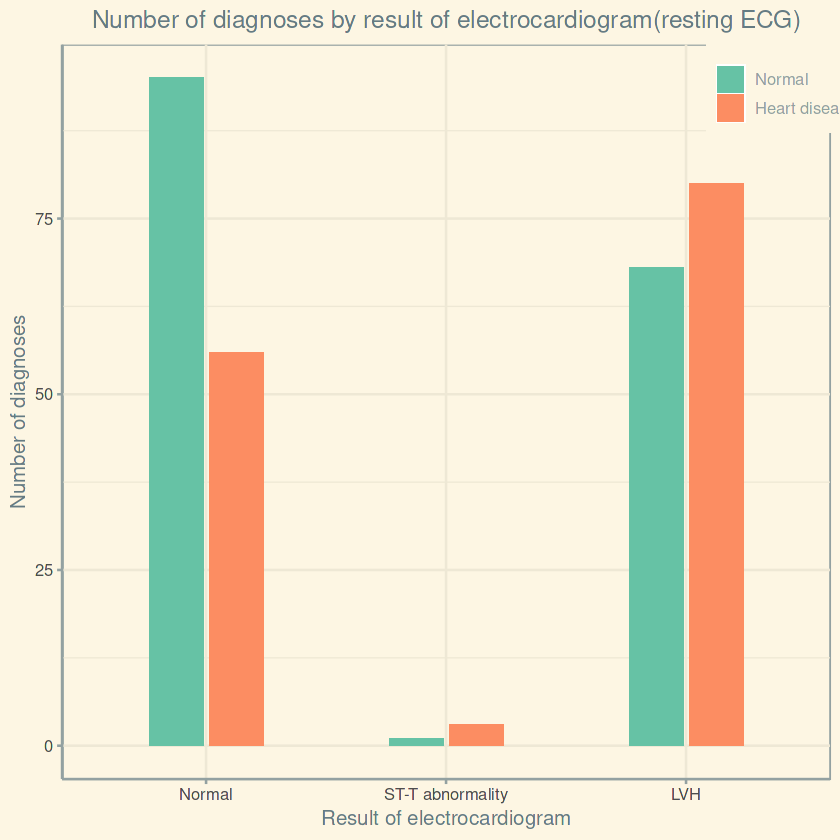

In [14]:
##restecg
##Result of electrocardiogram while at rest
ggplot(heart,aes(x=as.character(restecg),fill=target))+
  geom_bar(width = 0.5,position = "dodge2")+
  ggtitle("Number of diagnoses by result of electrocardiogram(resting ECG)")+
  xlab("Result of electrocardiogram")+
  ylab("Number of diagnoses")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_x_discrete(
    breaks = c(0, 1,2),
    labels = c("Normal", "ST-T abnormality","LVH"))+
  scale_fill_manual(labels = c("Normal", "Heart disease"),
                    values = c( "#66c2a5", "#fc8d62"))+
  theme(legend.title=element_blank())+
  theme(legend.position=c(0.94,0.94))

**Maximum heart rate achieved**


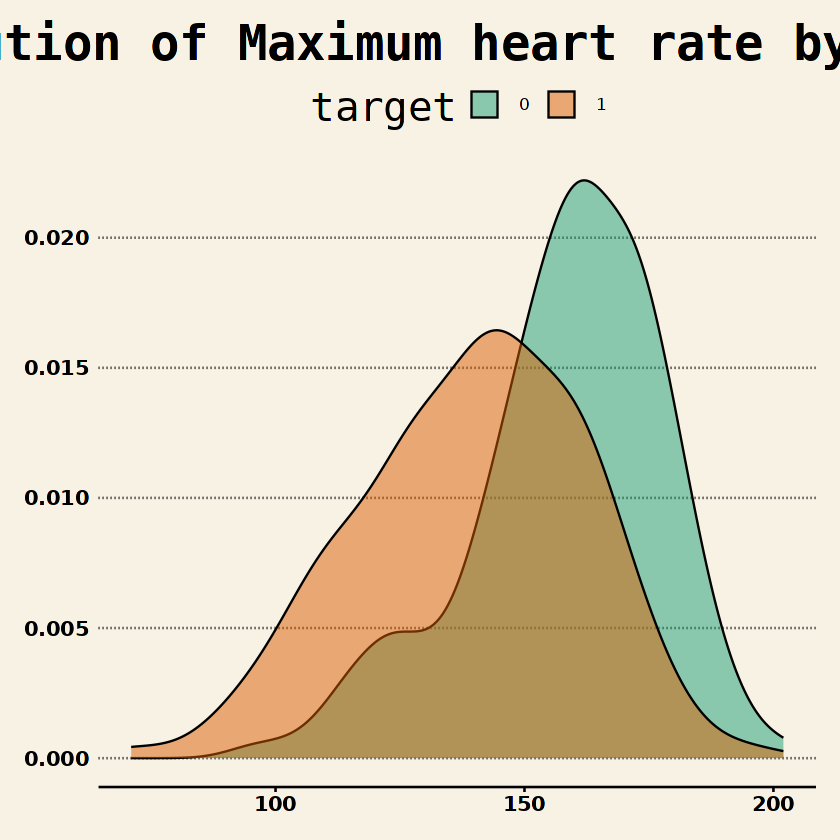

In [15]:
##thalach
## Maximum heart rate achieved
ggplot(heart,aes(x=thalach,fill=target))+
  geom_density(alpha=0.5)+
  ggtitle("Distribution of Maximum heart rate by Diagnosis")+
  xlab("Maximum heart rate")+
  ylab("Density")+
  theme_wsj()+
  scale_fill_brewer(palette="Dark2")+
  theme(plot.title = element_text(hjust = 0.5))

**Angina induced by exercise**


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


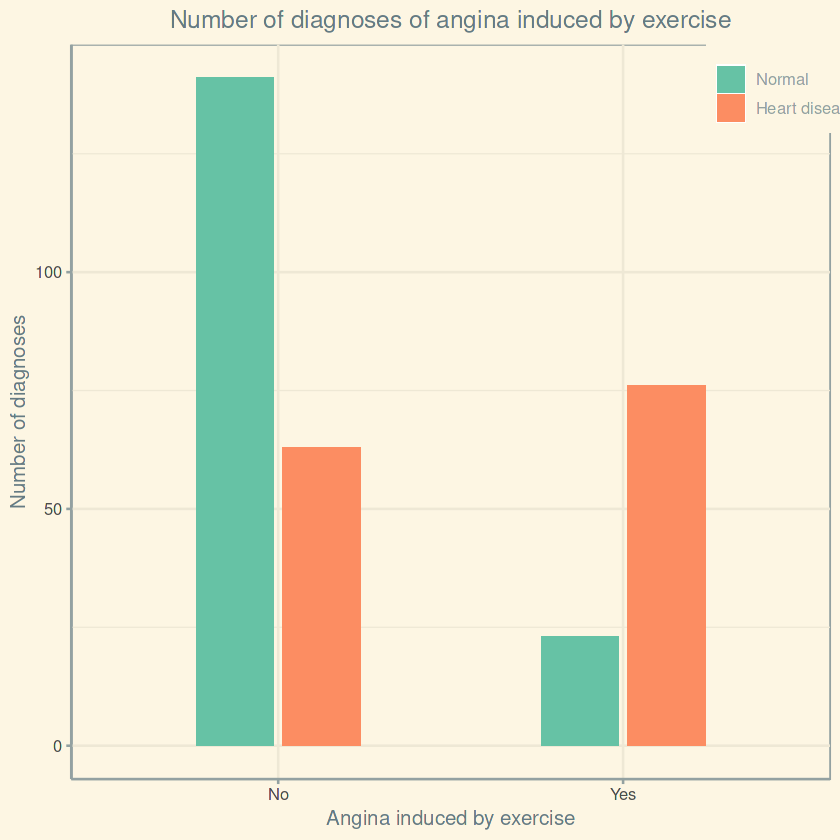

In [16]:
##exang
##Angina induced by exercise 0 depicting NO 1 depicting Yes 
ggplot(heart,aes(x=as.character(exang),fill=target))+
  geom_bar(width = 0.5,position = "dodge2")+
  ggtitle("Number of diagnoses of angina induced by exercise")+
  xlab("Angina induced by exercise")+
  ylab("Number of diagnoses")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_x_discrete(
    breaks = c(0, 1),
    labels = c("No", "Yes"))+
  scale_fill_manual(labels = c("Normal", "Heart disease"),
                    values = c( "#66c2a5", "#fc8d62"))+
  theme(legend.title=element_blank())+
  theme(legend.position=c(0.94,0.94))

**Exercise induced ST**


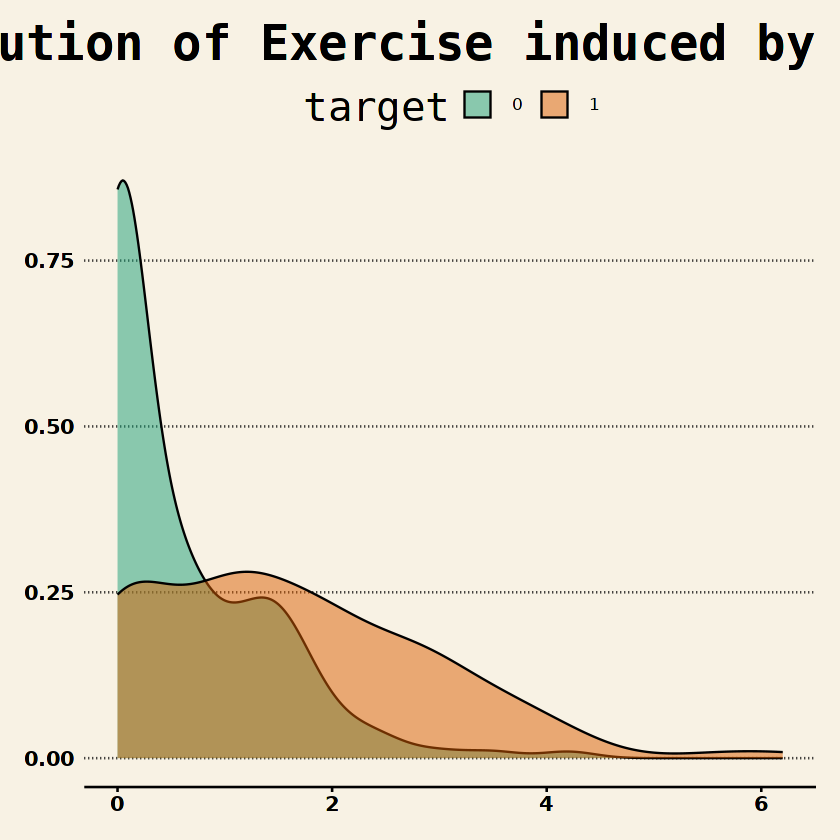

In [17]:
##oldpeak 
##Exercise induced ST-depression in relative with the state of rest

ggplot(heart,aes(x=oldpeak,fill=target))+
  geom_density(alpha=0.5)+
  ggtitle("Distribution of Exercise induced by Diagnosis")+
  theme_wsj()+
  scale_fill_brewer(palette="Dark2")+
  theme(plot.title = element_text(hjust = 0.5))

**ST segment**


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


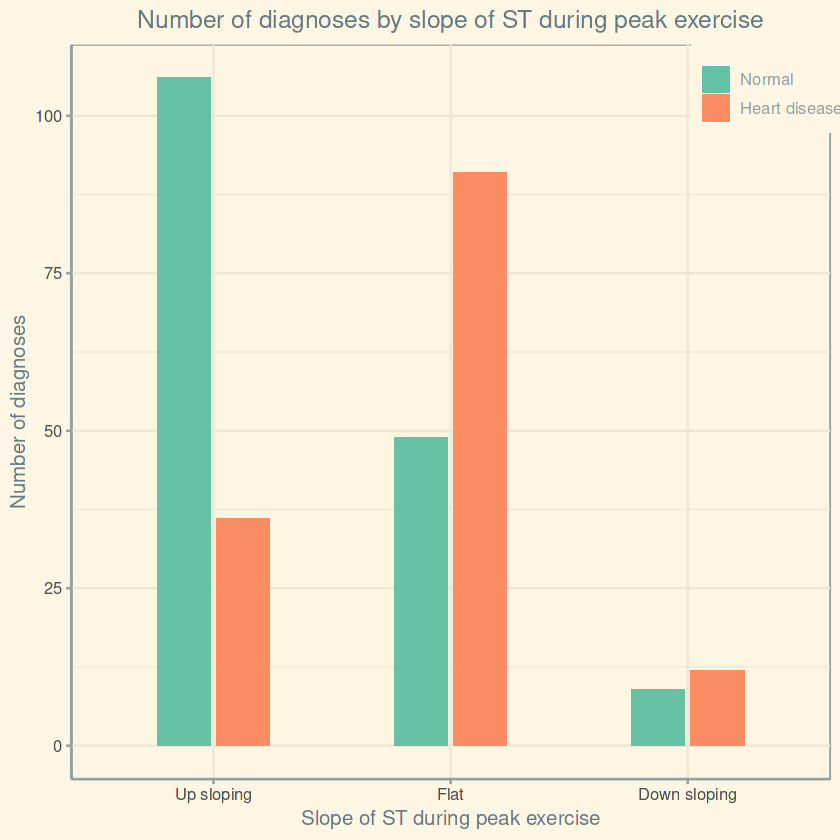

In [18]:
##slope 
##ST segment measured in terms of slope during peak exercise
## 0: up sloping; 1: flat; 2: down sloping

ggplot(heart,aes(x=as.character(slope),fill=target))+
  geom_bar(width = 0.5,position = "dodge2")+
  ggtitle("Number of diagnoses by slope of ST during peak exercise")+
  xlab("Slope of ST during peak exercise")+
  ylab("Number of diagnoses")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_x_discrete(
    breaks = c(0, 1,2),
    labels = c("Up sloping", "Flat","Down sloping"))+
  scale_fill_manual(labels = c("Normal", "Heart disease"),
                    values = c( "#66c2a5", "#fc8d62"))+
  theme(legend.title=element_blank())+
  theme(legend.position=c(0.92,0.94))

**The number of major vessels**


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


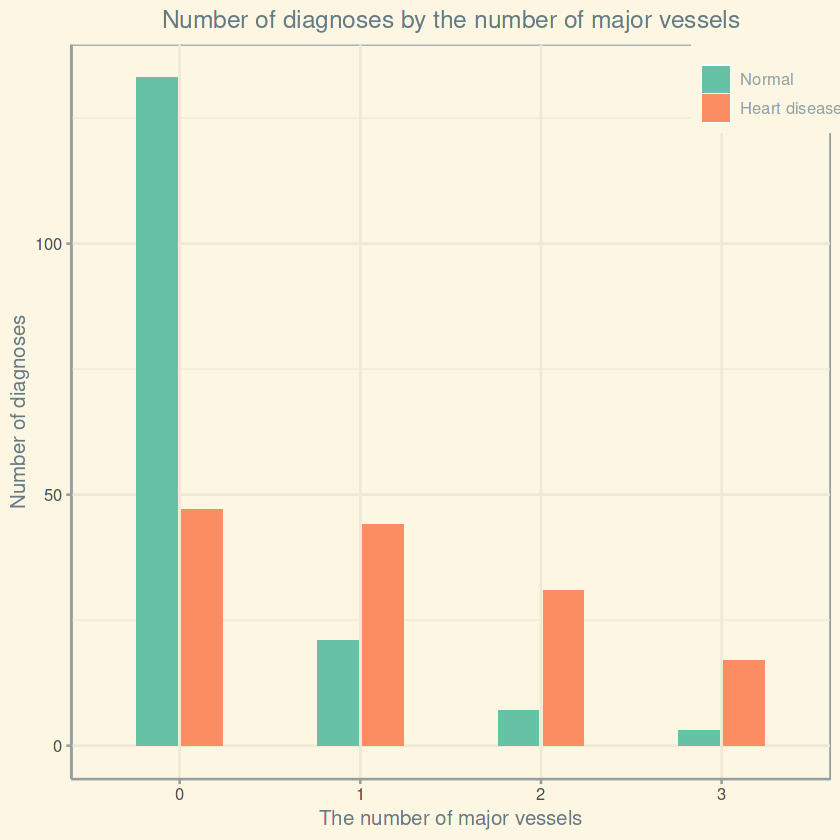

In [19]:
##ca 
##The number of major vessels

ggplot(heart,aes(x=as.character(ca),fill=target))+
  geom_bar(width = 0.5,position = "dodge2")+
  ggtitle("Number of diagnoses by the number of major vessels")+
  xlab("The number of major vessels")+
  ylab("Number of diagnoses")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_x_discrete(
    breaks = c(0, 1,2,3),
    labels = c("0", "1","2","3"))+
  scale_fill_manual(labels = c("Normal", "Heart disease"),
                    values = c( "#66c2a5", "#fc8d62"))+
  theme(legend.title=element_blank())+
  theme(legend.position=c(0.92,0.94))

**A blood disorder called thalassemia**


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


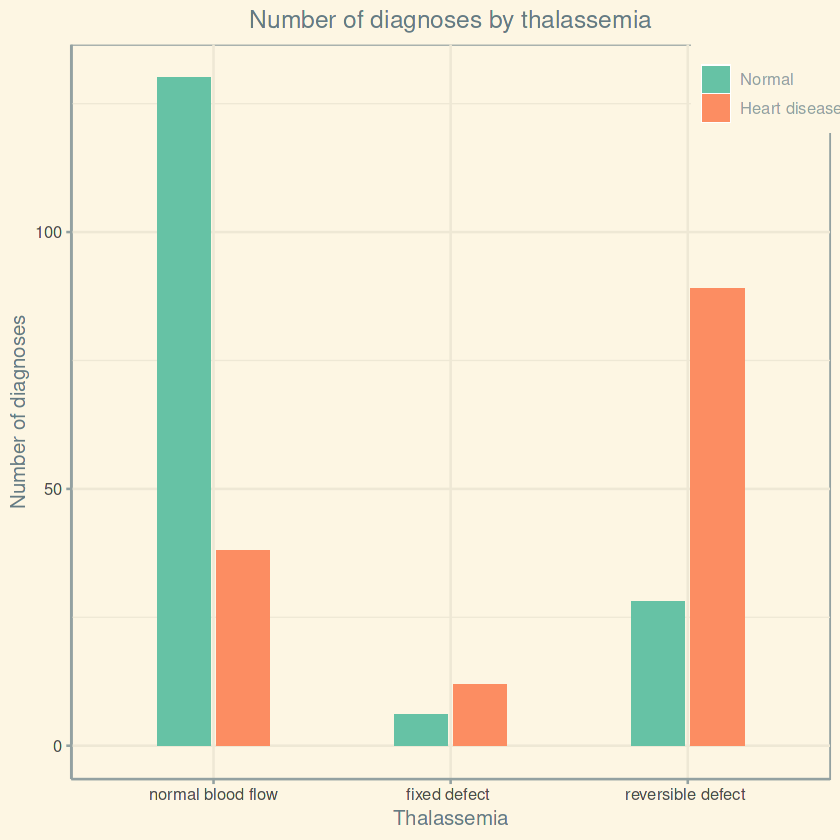

In [20]:
##thal
##A blood disorder called thalassemia
## 0: NULL 
## 1: normal blood flow
## 2: fixed defect  
## 3: reversible defect 

ggplot(heart,aes(x=as.character(thal),fill=target))+
  geom_bar(width = 0.5,position = "dodge2")+
  ggtitle("Number of diagnoses by thalassemia")+
  xlab("Thalassemia")+
  ylab("Number of diagnoses")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_x_discrete(
    breaks = c(0, 1,2,3),
    labels = c("NULL", "normal blood flow","fixed defect ","reversible defect "))+
  scale_fill_manual(labels = c("Normal", "Heart disease"),
                    values = c( "#66c2a5", "#fc8d62"))+
  theme(legend.title=element_blank())+
  theme(legend.position=c(0.92,0.94))

**Correlation analysis**

Let's see the correlation matrix of the dataset


In [21]:
##correlation matrix
cor(dplyr::select(heart,-target))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.00000000,-0.09754228,0.10413895,0.28494592,0.208950270,0.118530242,0.14886759,-0.393805806,0.09166077,0.203805481,0.161769559,0.36532320,0.12230014
sex,-0.09754228,1.00000000,0.01008389,-0.06445590,-0.199914683,0.047862121,0.02164735,-0.048663296,0.14620149,0.102172644,0.037532882,0.08604788,0.36791128
cp,0.10413895,0.01008389,1.00000000,-0.03607725,0.072318884,-0.039974990,0.06750523,-0.334421706,0.38405953,0.202276541,0.152050417,0.23311746,0.25983462
trestbps,0.28494592,-0.06445590,-0.03607725,1.00000000,0.130120108,0.175340227,0.14656039,-0.045350879,0.06476246,0.189170971,0.117381584,0.09752821,0.12687858
chol,0.20895027,-0.19991468,0.07231888,0.13012011,1.000000000,0.009841023,0.17104253,-0.003431832,0.06131038,0.046563989,-0.004061834,0.12372576,0.03043834
fbs,0.11853024,0.04786212,-0.03997499,0.17534023,0.009841023,1.000000000,0.06956450,-0.007854147,0.02566515,0.005747223,0.059894178,0.14076386,0.05416400
restecg,0.14886759,0.02164735,0.06750523,0.14656039,0.171042532,0.069564497,1.00000000,-0.083389433,0.08486695,0.114132813,0.133945690,0.13174877,0.01911508
thalach,-0.39380581,-0.04866330,-0.33442171,-0.04535088,-0.003431832,-0.007854147,-0.08338943,1.000000000,-0.37810342,-0.343085392,-0.385601162,-0.26569883,-0.25797989
exang,0.09166077,0.14620149,0.38405953,0.06476246,0.061310377,0.025665147,0.08486695,-0.378103424,1.00000000,0.288222808,0.257748369,0.14578813,0.32168024
oldpeak,0.20380548,0.10217264,0.20227654,0.18917097,0.046563989,0.005747223,0.11413281,-0.343085392,0.28822281,1.000000000,0.577536817,0.30106666,0.33392550


plot the correlation matrix


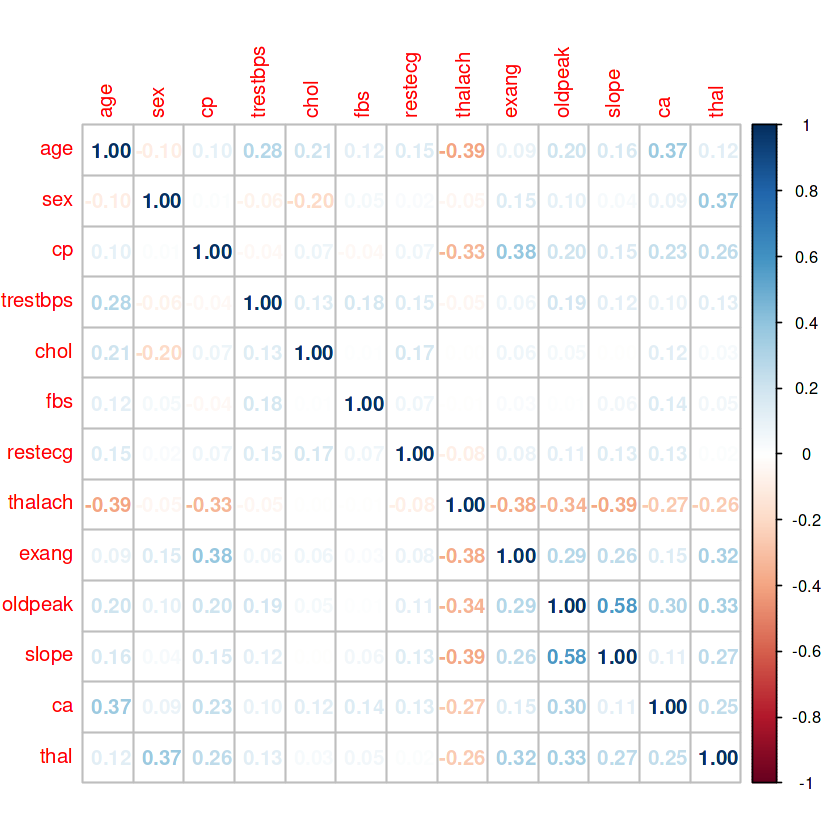

In [22]:
##plot the correlation matrix
corrplot(cor(dplyr::select(heart,-target)), method="number")

As we can see from the above correlation matrix, there are a lot of highly correlated variables.

Calculate the partial correlation coefficient, t-statistic, and corresponding p-value.


In [23]:
pcor(dplyr::select(heart,-target),method = "pearson")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000000,-0.09662506,-0.05195224,0.23613008,0.15054660,0.051408782,0.049132987,-0.350907647,-0.07923132,-0.004262019,-0.00763549,0.26318460,0.005780090
sex,-0.096625065,1.00000000,-0.11246092,-0.09301288,-0.20943411,0.045778428,0.080128370,0.003554320,0.08426500,0.036746000,-0.07702285,0.05486260,0.366762263
cp,-0.051952238,-0.11246092,1.00000000,-0.08996286,0.02953386,-0.055138124,0.034959061,-0.172892977,0.26274495,0.019243038,-0.03402988,0.13855891,0.143491767
trestbps,0.236130076,-0.09301288,-0.08996286,1.00000000,0.03946357,0.147279625,0.098707475,0.098275040,0.04324136,0.134540449,-0.01405648,-0.05598465,0.111392616
chol,0.150546602,-0.20943411,0.02953386,0.03946357,1.00000000,-0.026679655,0.148830984,0.104706275,0.06842628,0.011565294,-0.04846068,0.05295297,0.071459415
fbs,0.051408782,0.04577843,-0.05513812,0.14727962,-0.02667966,1.000000000,0.028146316,0.046851568,0.02931071,-0.099950432,0.08376504,0.13253458,0.005877107
restecg,0.049132987,0.08012837,0.03495906,0.09870748,0.14883098,0.028146316,1.000000000,0.009694646,0.02929914,-0.002049822,0.09690782,0.06591894,-0.091548426
thalach,-0.350907647,0.00355432,-0.17289298,0.09827504,0.10470628,0.046851568,0.009694646,1.000000000,-0.22703210,-0.044378910,-0.22061818,-0.05904566,-0.038985945
exang,-0.079231321,0.08426500,0.26274495,0.04324136,0.06842628,0.029310707,0.029299145,-0.227032096,1.00000000,0.080679673,0.03771707,-0.03982628,0.127626767
oldpeak,-0.004262019,0.03674600,0.01924304,0.13454045,0.01156529,-0.099950432,-0.002049822,-0.044378910,0.08067967,1.000000000,0.49655269,0.22359095,0.105730435


# Factor analysis

 We can safely assume that the independent variable has a high degree of correlation.
 and let's check the suitability for factor analysis.

**Kaiser-Meyer-Olkin (KMO) and Bartlett's Test**

Prior to the extraction of the constructs, there are some tests which must be conducted to examine the adequacy of the sample and the suitability of data for FA (LauraJ. Burton and Stephanie M. Mazerolle 2011)[^3].

[^3]: https://hal.science/hal-02557344v1/preview/Exploratory%20Factor%20Analysis%3B%20Concepts%20and%20Theory.pdf



In [24]:
##new dataset of all independent variable
heart2<-dplyr::select(heart,-target)
EFAtools::KMO(cor(heart2))


── Kaiser-Meyer-Olkin criterion (KMO) ──────────────────────────────────────────

! The overall KMO value for your data is mediocre.
  These data are probably suitable for factor analysis.

  Overall: 0.694

  For each variable:
     age      sex       cp trestbps     chol      fbs  restecg  thalach 
   0.656    0.500    0.735    0.611    0.572    0.540    0.689    0.744 
   exang  oldpeak    slope       ca     thal 
   0.784    0.718    0.671    0.714    0.739 

We can perform a factor analysis on this data because MSA > 0.5, and Bartlett's test should be significant.



In [25]:
bart_spher(heart2)

	Bartlett's Test of Sphericity

Call: bart_spher(x = heart2)

     X2 = 671.684
     df = 78
p-value < 2.22e-16

**How many factors do we need?**

A number of criteria are available to assist these decisions, but they do not always lead to the same or even similar results (Zwick and Velicer 1986; Thompson and Daniel 1996). Factor retentions methods are; Cumulative percent of variance extracted, Kaiser‟s criteria (eigenvalue > 1 rule) (Kaiser 1960), Scree test (Cattell 1966) and Parallel Analysis (Horn 1965). (Hair, Anderson et al. 1995a) mentioned that the majority of factor analysts commonly use multiple criteria[^3].


Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


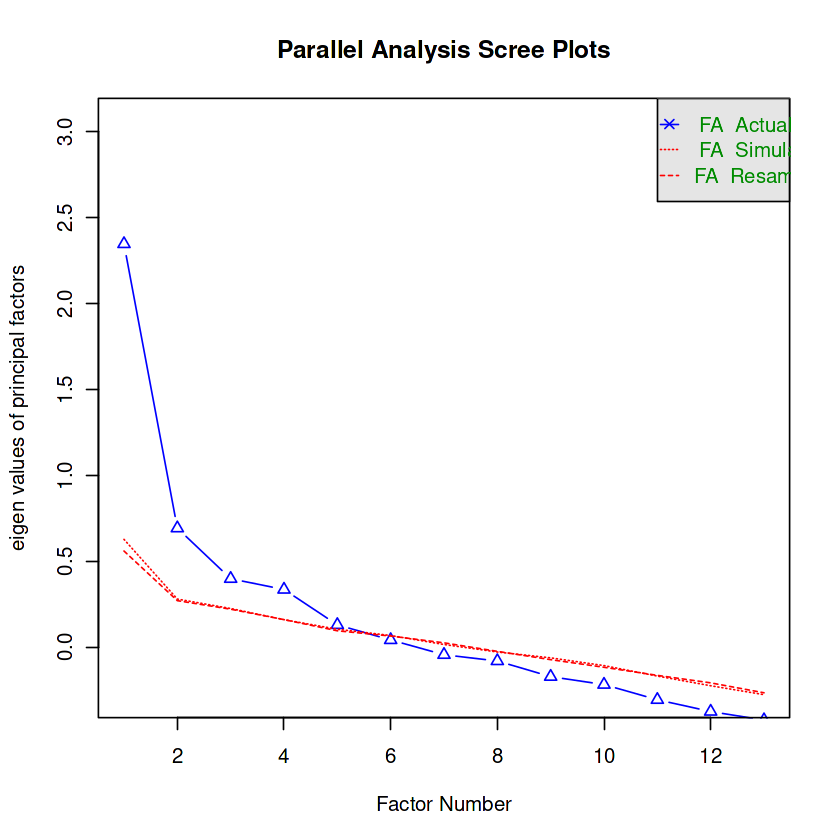

In [26]:
nafactor<-fa.parallel(heart2,fm = "ml",fa = "fa")

In [27]:
nafactor$fa.values

[1]  2.34807359  0.69379315  0.39951523  0.33679980  0.13095026  0.04318719
 [7] -0.04301876 -0.07923622 -0.17043039 -0.21667695 -0.30498550 -0.37355397
[13] -0.42330145

In [28]:
sum(nafactor$fa.values>1)


[1] 1

**Run the Factor Analysis**

Four factors will be used as the parallel analysis suggests, and let's also use the oblimin rotation because of the multicollinearity of the variables.


Loading required namespace: GPArotation



Factor Analysis using method =  minres
Call: fa(r = heart2, nfactors = 4, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
           MR3   MR4   MR1   MR2    h2    u2 com
age      -0.02  0.70  0.01 -0.09 0.494 0.506 1.0
sex      -0.03 -0.05 -0.04  0.82 0.667 0.333 1.0
cp       -0.05 -0.04  0.71 -0.05 0.462 0.538 1.0
trestbps  0.09  0.46 -0.22  0.02 0.206 0.794 1.5
chol     -0.08  0.31  0.04 -0.19 0.130 0.870 1.9
fbs       0.00  0.28 -0.17  0.11 0.080 0.920 2.1
restecg   0.06  0.26 -0.03 -0.01 0.075 0.925 1.1
thalach  -0.21 -0.20 -0.42  0.00 0.403 0.597 1.9
exang     0.12  0.01  0.50  0.12 0.347 0.653 1.2
oldpeak   0.49  0.19  0.13  0.12 0.448 0.552 1.6
slope     0.98 -0.03 -0.01 -0.02 0.935 0.065 1.0
ca       -0.06  0.47  0.17  0.13 0.306 0.694 1.5
thal      0.12  0.16  0.24  0.43 0.389 0.611 2.1

                       MR3  MR4  MR1  MR2
SS loadings           1.41 1.32 1.22 1.00
Proportion Var        0.11 0.10 0.09 0.08
Cumulative Var        0.

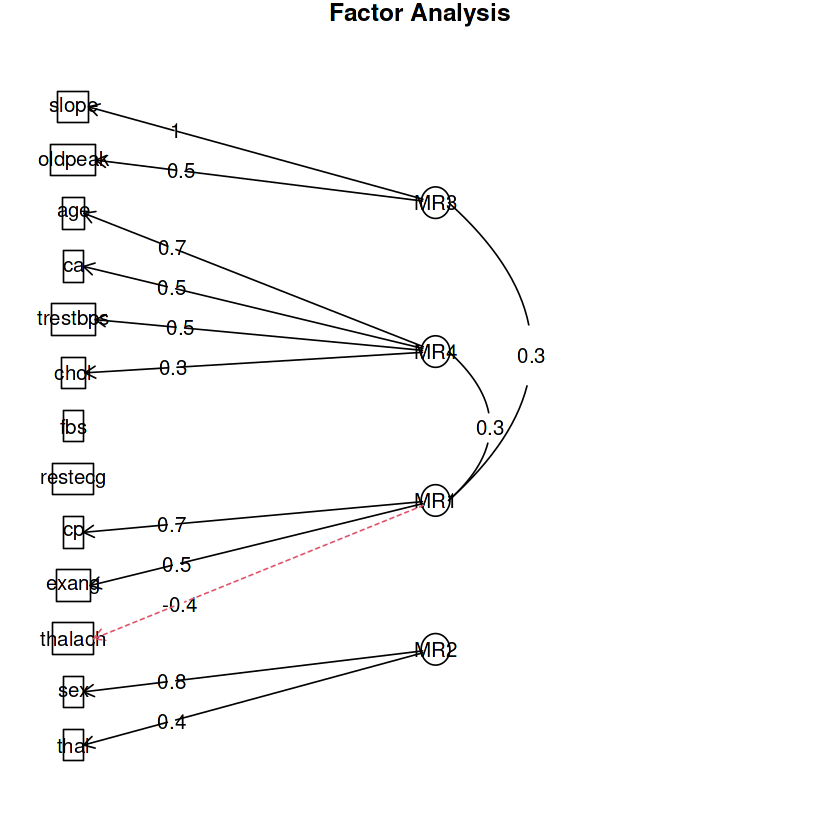

In [29]:
fit<-fa(heart2,nfactors = 4,rotate = "oblimin")
print(fit)
fa.diagram(fit)

The four factors explain 38% of the variance: factor 1 for 9%, factor 2 for 8%, factor 3 for 11%, and factor 4 for 10%

**Reliability analysis**


In [30]:
factor1<-c(3,8,9)
factor2<-c(2,13)
factor3<-c(10,11)
factor4<-c(1,4,5,12)

In [31]:
psych::alpha(heart2[,factor1])


Warning message in psych::alpha(heart2[, factor1]):
“Some items were negatively correlated with the total scale and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( thalach ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option

Warning message in sqrt(Vtc):
“NaNs produced”



Reliability analysis   
Call: psych::alpha(x = heart2[, factor1])

  raw_alpha std.alpha G6(smc) average_r  S/N    ase mean  sd median_r
    -0.067     -0.42  -0.028     -0.11 -0.3 0.0091   51 7.5    -0.33

    95% confidence boundaries 
         lower alpha upper
Feldt    -0.29 -0.07  0.13
Duhachek -0.08 -0.07 -0.05

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r   S/N alpha se var.r med.r
cp         -0.032     -1.22   -0.38     -0.38 -0.55   0.0045    NA -0.38
thalach     0.465      0.55    0.38      0.38  1.25   0.0470    NA  0.38
exang      -0.058     -1.00   -0.33     -0.33 -0.50   0.0096    NA -0.33

 Item statistics 
          n raw.r std.r r.cor r.drop   mean    sd
cp      303 -0.29  0.69   NaN  -0.33   2.16  0.96
thalach 303  1.00  0.19   NaN  -0.41 149.61 22.88
exang   303 -0.35  0.66   NaN  -0.37   0.33  0.47

Non missing response frequency for each item
         0    1    2    3 miss
cp    0.08 0.17 0.28 0.48    0
exang 0.67 0.33 0.00 0.0

In [32]:
psych::alpha(heart2[,factor2])



Reliability analysis   
Call: psych::alpha(x = heart2[, factor2])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.45      0.54    0.37      0.37 1.2 0.048  1.3 0.6     0.37

    95% confidence boundaries 
         lower alpha upper
Feldt     0.31  0.45  0.56
Duhachek  0.35  0.45  0.54

 Reliability if an item is dropped:
     raw_alpha std.alpha G6(smc) average_r  S/N alpha se var.r med.r
sex       0.18      0.37    0.14      0.37 0.58       NA     0  0.37
thal      0.75      0.37    0.14      0.37 0.58       NA     0  0.37

 Item statistics 
       n raw.r std.r r.cor r.drop mean   sd
sex  303  0.68  0.83   0.5   0.37 0.68 0.47
thal 303  0.93  0.83   0.5   0.37 1.83 0.96

Non missing response frequency for each item
        0    1    2    3 miss
sex  0.32 0.68 0.00 0.00    0
thal 0.00 0.55 0.06 0.39    0

In [33]:
psych::alpha(heart2[,factor3])


Number of categories should be increased  in order to count frequencies. 




Reliability analysis   
Call: psych::alpha(x = heart2[, factor3])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.65      0.73    0.58      0.58 2.7 0.031 0.82 0.8     0.58

    95% confidence boundaries 
         lower alpha upper
Feldt     0.56  0.65  0.72
Duhachek  0.59  0.65  0.71

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
oldpeak      1.09      0.58    0.33      0.58 1.4       NA     0  0.58
slope        0.31      0.58    0.33      0.58 1.4       NA     0  0.58

 Item statistics 
          n raw.r std.r r.cor r.drop mean   sd
oldpeak 303  0.95  0.89  0.67   0.58  1.0 1.16
slope   303  0.81  0.89  0.67   0.58  0.6 0.62

In [34]:
psych::alpha(heart2[,factor4])

Number of categories should be increased  in order to count frequencies. 

Warning message in rbind(items, dummy):
“number of columns of result is not a multiple of vector length (arg 1)”



Reliability analysis   
Call: psych::alpha(x = heart2[, factor4])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean sd median_r
       0.2       0.5    0.45       0.2   1 0.042  108 15     0.17

    95% confidence boundaries 
         lower alpha upper
Feldt     0.04   0.2  0.34
Duhachek  0.12   0.2  0.28

 Reliability if an item is dropped:
         raw_alpha std.alpha G6(smc) average_r  S/N alpha se  var.r med.r
age           0.12      0.28    0.21      0.12 0.40    0.044 0.0003  0.12
trestbps      0.11      0.48    0.40      0.23 0.91    0.026 0.0150  0.21
chol          0.30      0.50    0.42      0.25 1.00    0.044 0.0189  0.28
ca            0.22      0.44    0.35      0.21 0.79    0.048 0.0060  0.21

 Item statistics 
           n raw.r std.r r.cor r.drop   mean    sd
age      303  0.42  0.73  0.63   0.28  54.44  9.04
trestbps 303  0.45  0.60  0.35   0.17 131.69 17.60
chol     303  0.93  0.58  0.30   0.19 246.69 51.78
ca       303  0.21  0.63  0.42   0.19   0.66  0.93

Non 

raw alphas for the factors are -0.067, 0.45, 0.65, and 0.2.

**Regression analysis using the factor scores as the independent variable**

Let's leave the interpretation of the factors and their current names as they are right now and combine the dependent variable and the factor scores into a dataset.



In [35]:
regression_data<-as.data.frame(cbind(heart[,14],fit$scores))
names(regression_data)<-c("diagnosis","MR1","MR2","MR3","MR4")
head(regression_data,10)

,diagnosis,MR1,MR2,MR3,MR4
,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,2.07605785316065,0.722122748566266,-1.27821179507178,0.511120995460123
2,1,0.793445506879554,1.68076704867901,1.20810109726324,0.387706794381424
3,1,0.747348960418942,1.17878057608997,1.42393322996095,0.815545981044379
4,0,2.12130547281575,-1.22210127616749,-0.691521186838782,0.468209929894614
5,0,-0.945197440164875,-0.891881588556995,-1.05376912182974,-1.10730462853047
6,0,-0.966241609325291,-0.630984768142128,-1.08402195995649,0.24843250132237
7,1,2.17853114143861,1.06156181326078,0.306424180579811,-1.17604866262199
8,0,-0.923967735992469,-0.0422020641176284,0.541625959978379,-1.3031282514449
9,1,0.595544792461032,0.640226989590609,0.487308698961542,0.582538045435297


In [36]:
str(regression_data)


'data.frame':	303 obs. of  5 variables:
 $ diagnosis: chr  "0" "1" "1" "0" ...
 $ MR1      : chr  "2.07605785316065" "0.793445506879554" "0.747348960418942" "2.12130547281575" ...
 $ MR2      : chr  "0.722122748566266" "1.68076704867901" "1.17878057608997" "-1.22210127616749" ...
 $ MR3      : chr  "-1.27821179507178" "1.20810109726324" "1.42393322996095" "-0.691521186838782" ...
 $ MR4      : chr  "0.511120995460123" "0.387706794381424" "0.815545981044379" "0.468209929894614" ...


convert all the variables to numeric variables


In [37]:
regression_data$diagnosis<-as.numeric(regression_data$diagnosis)
regression_data$MR1<-as.numeric(regression_data$MR1)
regression_data$MR2<-as.numeric(regression_data$MR2) 
regression_data$MR3<-as.numeric(regression_data$MR3) 
regression_data$MR4<-as.numeric(regression_data$MR4)

divide the data into training and test sets before performing any analysis.


In [38]:
##make it reproducible
set.seed(113)
#use 80% of dataset as training set and 20% as test set
sample <- sample(c(TRUE, FALSE), nrow(regression_data), replace=TRUE, prob=c(0.8,0.2))
train.data <- regression_data[sample, ]
test.data <- regression_data[!sample, ]

**using variables to investigate trends**

the relationship between diagnosis and MR1



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


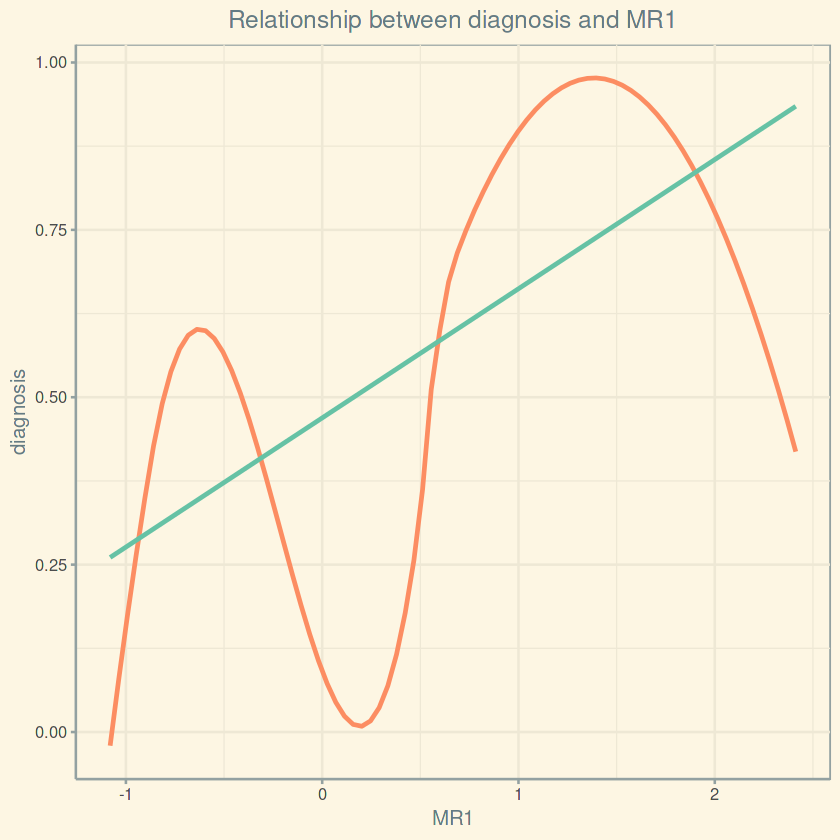

In [39]:
ggplot(train.data,aes(y=diagnosis,x=as.numeric(MR1)))+
  geom_smooth(method="loess",col="#fc8d62",se=FALSE)+
  geom_smooth(method = "lm",col="#66c2a5",se=FALSE)+
  ggtitle("Relationship between diagnosis and MR1")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
    xlab("MR1")+
    ylab("diagnosis")

the relationship between diagnosis and MR2


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


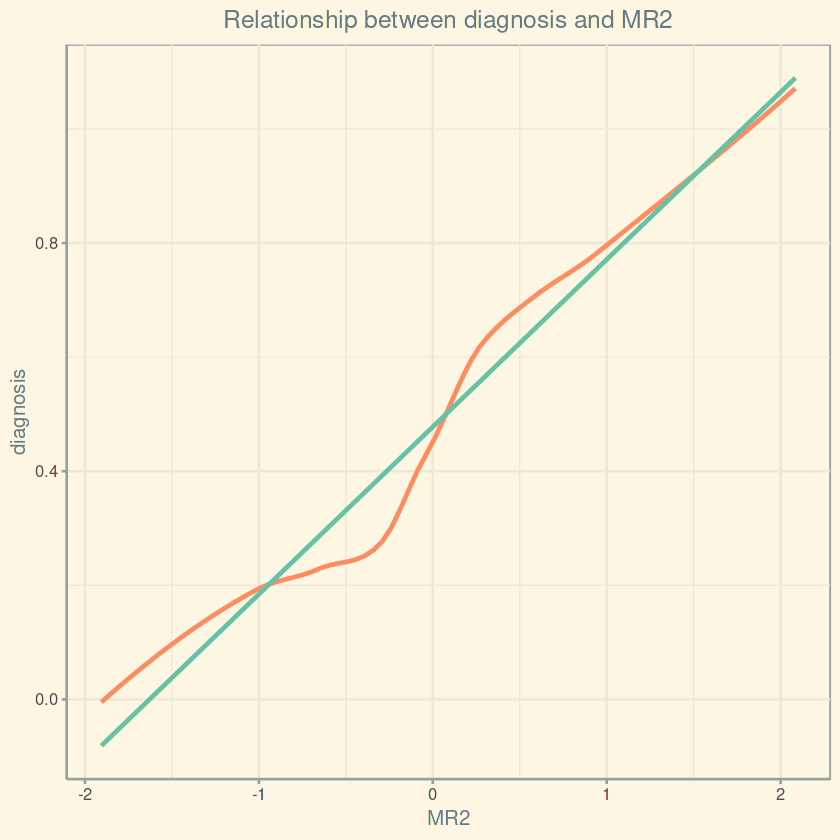

In [40]:
ggplot(train.data,aes(y=diagnosis,x=as.numeric(MR2)))+
  geom_smooth(method="loess",col="#fc8d62",se=FALSE)+
  geom_smooth(method = "lm",col="#66c2a5",se=FALSE)+
  ggtitle("Relationship between diagnosis and MR2")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  xlab("MR2")+
  ylab("diagnosis")

the relationship between diagnosis and MR3


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


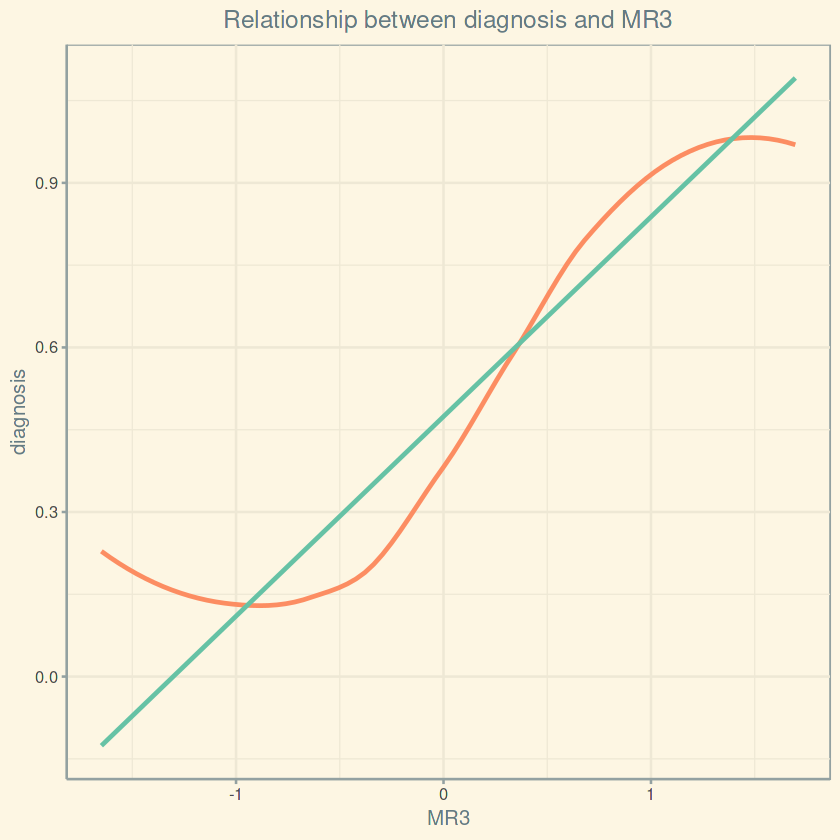

In [41]:
ggplot(train.data,aes(y=diagnosis,x=as.numeric(MR3)))+
  geom_smooth(method="loess",col="#fc8d62",se=FALSE)+
  geom_smooth(method = "lm",col="#66c2a5",se=FALSE)+
  ggtitle("Relationship between diagnosis and MR3")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  xlab("MR3")+
  ylab("diagnosis")

the relationship between diagnosis and MR4


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


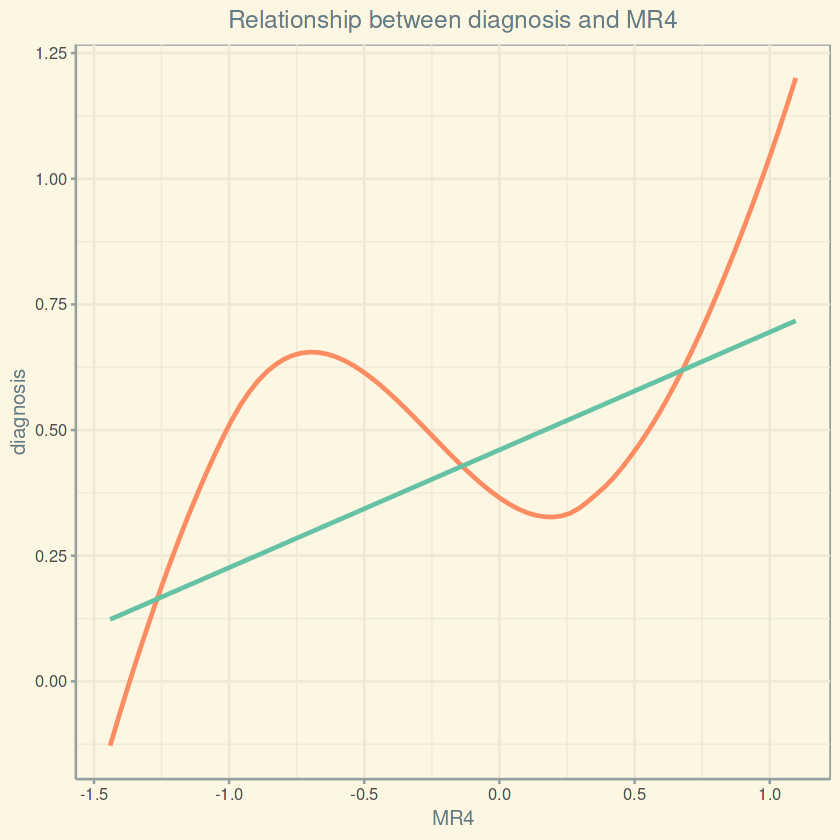

In [42]:
ggplot(train.data,aes(y=diagnosis,x=as.numeric(MR4)))+
  geom_smooth(method="loess",col="#fc8d62",se=FALSE)+
  geom_smooth(method = "lm",col="#66c2a5",se=FALSE)+
  ggtitle("Relationship between diagnosis and MR4")+
  theme_solarized()+
  scale_fill_brewer(palette="Set2")+
  theme(plot.title = element_text(hjust = 0.5))+
  xlab("MR4")+
  ylab("diagnosis")

# Model Fitting

**Multiple logistic regression model using all the data**


In [43]:
model1<-glm(diagnosis~.,data = train.data)
summary(model1)


Call:
glm(formula = diagnosis ~ ., data = train.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.01595  -0.26410  -0.04455   0.22505   0.96720  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.46885    0.02317  20.238  < 2e-16 ***
MR1          0.04943    0.02610   1.894   0.0595 .  
MR2          0.15209    0.03326   4.573 7.75e-06 ***
MR3          0.23253    0.03358   6.925 4.06e-11 ***
MR4          0.15976    0.02943   5.428 1.41e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1293282)

    Null deviance: 60.298  on 241  degrees of freedom
Residual deviance: 30.651  on 237  degrees of freedom
AIC: 198.73

Number of Fisher Scoring iterations: 2


all four independent variables except MR1 are significant in the model.

using the model to predict the quality from the testing data and compare it with the real data

In [44]:
##apply the model to the test data
test1<-predict(model1,test.data)   
##convert the probability value to good or bad.
test1<-ifelse(test1>0.5,1,0)          
##compare the model's output to the actual data
confusionMatrix(table(test1,test.data$diagnosis))

Confusion Matrix and Statistics

     
test1  0  1
    0 31  3
    1  5 22
                                          
               Accuracy : 0.8689          
                 95% CI : (0.7578, 0.9416)
    No Information Rate : 0.5902          
    P-Value [Acc > NIR] : 2.146e-06       
                                          
                  Kappa : 0.7322          
                                          
 Mcnemar's Test P-Value : 0.7237          
                                          
            Sensitivity : 0.8611          
            Specificity : 0.8800          
         Pos Pred Value : 0.9118          
         Neg Pred Value : 0.8148          
             Prevalence : 0.5902          
         Detection Rate : 0.5082          
   Detection Prevalence : 0.5574          
      Balanced Accuracy : 0.8706          
                                          
       'Positive' Class : 0               
                                          

**polynomial regression model**

In order to develop a polynomial regression model, we will add higher dimensional variables using the plots from the "Using Variables to Investigate Trends" section.


In [45]:
model2<-glm(diagnosis~poly(MR1,4)+
              poly(MR2,4)+
              poly(MR3,4)+
              poly(MR4,4),data = train.data)

summary(model2)


Call:
glm(formula = diagnosis ~ poly(MR1, 4) + poly(MR2, 4) + poly(MR3, 
    4) + poly(MR4, 4), data = train.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.92669  -0.19366  -0.01312   0.14807   0.96623  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.47107    0.02279  20.671  < 2e-16 ***
poly(MR1, 4)1  0.69839    0.41443   1.685   0.0933 .  
poly(MR1, 4)2 -0.65110    0.37803  -1.722   0.0864 .  
poly(MR1, 4)3 -0.16704    0.38956  -0.429   0.6685    
poly(MR1, 4)4  0.29469    0.40175   0.734   0.4640    
poly(MR2, 4)1  1.75444    0.43423   4.040 7.33e-05 ***
poly(MR2, 4)2 -0.16667    0.39877  -0.418   0.6764    
poly(MR2, 4)3 -0.61028    0.39608  -1.541   0.1248    
poly(MR2, 4)4  0.06670    0.37991   0.176   0.8608    
poly(MR3, 4)1  2.77817    0.48427   5.737 3.09e-08 ***
poly(MR3, 4)2 -0.16108    0.40813  -0.395   0.6935    
poly(MR3, 4)3 -0.90945    0.38775  -2.345   0.0199 *  
poly(MR3, 4)4 -0.52250    0.37

In [46]:
##apply the model to the test data
test2<-predict(model2,test.data)   
##convert the probability value to good or bad.
test2<-ifelse(test2>0.5,1,0)          
##compare the model's output to the actual data
confusionMatrix(table(test2,test.data$diagnosis))

Confusion Matrix and Statistics

     
test2  0  1
    0 31  5
    1  5 20
                                          
               Accuracy : 0.8361          
                 95% CI : (0.7191, 0.9185)
    No Information Rate : 0.5902          
    P-Value [Acc > NIR] : 3.428e-05       
                                          
                  Kappa : 0.6611          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8611          
            Specificity : 0.8000          
         Pos Pred Value : 0.8611          
         Neg Pred Value : 0.8000          
             Prevalence : 0.5902          
         Detection Rate : 0.5082          
   Detection Prevalence : 0.5902          
      Balanced Accuracy : 0.8306          
                                          
       'Positive' Class : 0               
                                          

**Spline Regression**

We'll examine whether or not adding splines to the polynomial model will make it better.

In [47]:
model3<-glm(diagnosis~ns(MR1,4)+
              ns(MR2,4)+
              ns(MR3,4)+
              ns(MR4,4),data = train.data)

summary(model3)


Call:
glm(formula = diagnosis ~ ns(MR1, 4) + ns(MR2, 4) + ns(MR3, 4) + 
    ns(MR4, 4), data = train.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.92490  -0.18320  -0.00745   0.14383   0.99462  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.30697    0.20792  -1.476  0.14125    
ns(MR1, 4)1  0.02382    0.25994   0.092  0.92707    
ns(MR1, 4)2  0.23241    0.28243   0.823  0.41144    
ns(MR1, 4)3 -0.02711    0.46539  -0.058  0.95360    
ns(MR1, 4)4  0.04053    0.15506   0.261  0.79405    
ns(MR2, 4)1  0.11175    0.16879   0.662  0.50862    
ns(MR2, 4)2  0.36744    0.15451   2.378  0.01824 *  
ns(MR2, 4)3  0.13824    0.39496   0.350  0.72666    
ns(MR2, 4)4  0.25676    0.20343   1.262  0.20820    
ns(MR3, 4)1  0.19734    0.13226   1.492  0.13709    
ns(MR3, 4)2  0.64788    0.13930   4.651 5.64e-06 ***
ns(MR3, 4)3  0.48715    0.29128   1.672  0.09583 .  
ns(MR3, 4)4  0.30943    0.17633   1.755  0.08064 .  
ns(MR4, 4)1

In [48]:
##apply the model to the test data
test3<-predict(model3,test.data)   
##convert the probability value to good or bad.
test3<-ifelse(test3>0.5,1,0)          
##compare the model's output to the actual data
confusionMatrix(table(test3,test.data$diagnosis))

Confusion Matrix and Statistics

     
test3  0  1
    0 31  5
    1  5 20
                                          
               Accuracy : 0.8361          
                 95% CI : (0.7191, 0.9185)
    No Information Rate : 0.5902          
    P-Value [Acc > NIR] : 3.428e-05       
                                          
                  Kappa : 0.6611          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8611          
            Specificity : 0.8000          
         Pos Pred Value : 0.8611          
         Neg Pred Value : 0.8000          
             Prevalence : 0.5902          
         Detection Rate : 0.5082          
   Detection Prevalence : 0.5902          
      Balanced Accuracy : 0.8306          
                                          
       'Positive' Class : 0               
                                          

**The results**

Through the use of our linear regression model, we can achieve 87% accuracy, 86% sensitivity, and 88% specificity. (the best that we get).

# References

1. [Heart disease](https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118)

2. [original data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

3. [Exploratory Factor Analysis; Concepts and Theory](https://hal.science/hal-02557344v1/preview/Exploratory%20Factor%20Analysis%3B%20Concepts%20and%20Theory.pdf)